<a href="https://colab.research.google.com/github/NiEl0503/Probabilidade-e-Amostragem/blob/main/Probabilidade_e_Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estatística - Probabilidade e Amostragem**


Importando bibliotecas

In [1]:
from scipy.stats import norm, binom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Importando a base de dados

In [2]:
df_populacao = pd.read_csv('/content/RRLNbvGQQtu5fPdxzFPI_populacao_brasileira.csv.csv')

In [ ]:
df_populacao.head(5)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
df_populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [3]:
# Removendo coluna sem nome (Unnamed)
df = df_populacao.drop(columns=['Unnamed: 0'])
df

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M
...,...,...,...,...,...,...
995,AC,22,Médio,Básico,2852.40,F
996,PE,40,Fundamental,Básico,2533.96,M
997,GO,27,Pós-graduação,Intermediário,1405.30,F
998,RS,61,Fundamental,Avançado,3513.60,F


**Contexto:**

Você é uma pesquisadora desenvolvendo uma análise sobre as
características da força de trabalho nos estados brasileiross. Responda as perguntas abaixo:

1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado

In [ ]:
# Contar o número total de pessoas - número total de casos no espaço amostral
total_pessoas = len(df)
total_pessoas

1000

In [ ]:
# Contar pessoas fluentes em inglês (Avançado) - número de casos favoráveis ​​ao evento A
fluentes_ingles = len(df[df['nível de proficiência em inglês'] == 'Avançado'])
fluentes_ingles

344

In [ ]:
# Calcular a probabilidade de ser fluente
# P(A) = número de casos favoráveis ​​ao evento A / número total de casos no espaço amostral.
probabilidade_fluente = fluentes_ingles / total_pessoas
probabilidade_fluente

0.344

In [ ]:
# Calcular a probabilidade de não ser fluente
#  P(Ac) = 1 - P(A).
probabilidade_nao_fluente = 1 - probabilidade_fluente

print(f'A probabilidade de não ser fluente em inglês é: {probabilidade_nao_fluente:.2%}')

A probabilidade de não ser fluente em inglês é: 65.60%


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
# Filtrar pessoas de Alagoas (AL) ou Pará (PA)
pessoas_AL_PA = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]
pessoas_AL_PA

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
17,PA,19,Médio,Básico,2588.12,M
32,PA,33,Superior,Intermediário,3018.42,F
74,PA,48,Fundamental,Intermediário,3279.97,M
106,AL,52,Superior,Básico,2754.26,F
114,AL,26,Fundamental,Intermediário,2731.11,F
...,...,...,...,...,...,...
972,AL,22,Pós-graduação,Avançado,1858.31,M
976,AL,36,Médio,Avançado,2917.32,F
977,AL,37,Fundamental,Intermediário,2878.25,F
982,AL,18,Superior,Intermediário,4221.03,F


In [ ]:
# Contar o número total de pessoas de AL ou PA - Casos possíveis:
# conjunto total de alagoanos ou paraenses, independentemente do nível de renda
total_pessoas_AL_PA = len(pessoas_AL_PA)
total_pessoas_AL_PA

79

In [ ]:
# Filtrar pessoas de AL ou PA com renda superior a 5.000 reais
pessoas_renda_acima_5000 = pessoas_AL_PA[pessoas_AL_PA['renda'] > 5000]
pessoas_renda_acima_5000

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
116,PA,29,Fundamental,Intermediário,5573.36,F
371,PA,57,Fundamental,Intermediário,5163.25,M
619,AL,62,Fundamental,Básico,5252.44,M
691,AL,53,Superior,Intermediário,5210.52,F


In [ ]:
# Contar o número de pessoas com renda superior a 5.000 reais - Casos favoráveis:
# subconjunto de pessoas que atendem à condição (ter renda superior a 5 mil reais e ser de AL ou PA)
total_pessoas_renda_acima_5000 = len(pessoas_renda_acima_5000)
total_pessoas_renda_acima_5000

4

In [ ]:
# Calcular a probabilidade - Probabilidade = Casos favoráveis/casos possíveis x 100
probabilidade = total_pessoas_renda_acima_5000 / total_pessoas_AL_PA

print(f'Probabilidade de ter renda superior a 5.000 reais: {probabilidade:.2%}')

Probabilidade de ter renda superior a 5.000 reais: 5.06%


3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?

In [6]:
# a. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas.
# Filtrar pessoas de Amazonas
pessoas_AM = df[(df['estado'] == 'AM')]
pessoas_AM

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
2,AM,32,Fundamental,Intermediário,3835.69,M
5,AM,38,Fundamental,Avançado,4441.57,F
13,AM,57,Médio,Básico,2844.32,M
23,AM,38,Médio,Intermediário,5075.40,M
45,AM,31,Pós-graduação,Básico,5270.69,F
54,AM,25,Superior,Intermediário,3478.98,M
97,AM,41,Superior,Intermediário,1345.14,F
149,AM,21,Superior,Básico,2625.18,F
195,AM,49,Fundamental,Básico,1297.42,M
230,AM,33,Pós-graduação,Intermediário,2373.03,M


In [7]:
# Contar o número total de pessoas de AL ou PA - Casos possíveis:
# conjunto total de pessoas de Amazona
total_pessoas_AM = len(pessoas_AM)
total_pessoas_AM

38

In [9]:
# Filtrar pessoas de AM com escolaridade de ensino superior completo
pessoas_escolaridade = pessoas_AM[(pessoas_AM['escolaridade'] == 'Superior') | (pessoas_AM['escolaridade'] == 'Pós-graduação')]
pessoas_escolaridade

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
45,AM,31,Pós-graduação,Básico,5270.69,F
54,AM,25,Superior,Intermediário,3478.98,M
97,AM,41,Superior,Intermediário,1345.14,F
149,AM,21,Superior,Básico,2625.18,F
230,AM,33,Pós-graduação,Intermediário,2373.03,M
330,AM,21,Pós-graduação,Avançado,3658.54,M
344,AM,63,Pós-graduação,Básico,2510.56,F
407,AM,60,Pós-graduação,Intermediário,1929.92,F
423,AM,33,Pós-graduação,Intermediário,4329.15,F
425,AM,59,Pós-graduação,Intermediário,3709.00,F


In [10]:
# Contar o número de pessoas com escolaridade de ensino superior completo - Casos favoráveis:
# subconjunto de pessoas que atendem à condição (ter escolaridade de ensino superior completo e ser de AM)
total_pessoas_escolaridade = len(pessoas_escolaridade)
total_pessoas_escolaridade

21

In [11]:
# Calcular a probabilidade - Probabilidade = Casos favoráveis/casos possíveis x 100
probabilidade_AM = total_pessoas_escolaridade / total_pessoas_AM

print(f'A probabilidade de ter ensino superior completo en AM é: {probabilidade_AM:.2%}')

A probabilidade de ter ensino superior completo en AM é: 55.26%


b. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

Probabilidade geométrica

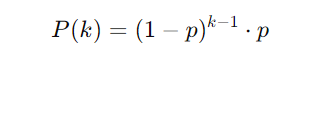



P(k) é a probabilidade de que o primeiro sucesso ocorra na tentativa k.

p é a probabilidade de sucesso (ter concluído o ensino superior).

(1 - 𝑝) é a probabilidade de não ter concluído o ensino superior.

k é o número de tentativas (neste caso, 𝑘=5).

In [12]:
# Calcular a probabilidade de sucesso na quinta tentativa.
k = 5
probabilidade_quinta_tentativa = ((1 - probabilidade_AM) ** (k-1)) * (probabilidade_AM)
print(f'Probabilidade de a quinta pessoa ter concluído o ensino superior em AM: {probabilidade_quinta_tentativa:.2%}')

Probabilidade de a quinta pessoa ter concluído o ensino superior em AM: 2.21%


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?


In [ ]:
# a. Faixa Maior

# Limites de intervalos usando np.range(inicio,fim,intervalo):
# +1500 é adicionado para garantir que o último intervalo capture a renda máxima.
faixas = np.arange(0, df['renda'].max() + 1500, 1500)

# Criar categorias de renda usando pd.cut(x,bins, right=True):
df['faixa_renda'] = pd.cut(df['renda'], bins=faixas, right=False)

# Contar quantas pessoas se enquadram em cada faixa de renda
frequencia_faixas = df['faixa_renda'].value_counts().sort_index()

faixa_dominante = frequencia_faixas.idxmax()

print(f'A maioria das pessoas está na faixa de renda: {int(faixa_dominante.left)} a {int(faixa_dominante.right)} reais')

A maioria das pessoas está na faixa de renda: 3000 a 4500 reais


b. Fdp

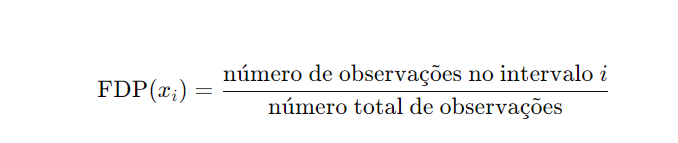

In [ ]:
fdp = (frequencia_faixas / len(df)) * 100

print('Função Densidade de Probabilidade para cada faixa de renda:')
for faixa, prob in fdp.items():
    print(f'{faixa}: {prob:.2f}%')

Função Densidade de Probabilidade para cada faixa de renda:
[0.0, 1500.0): 5.50%
[1500.0, 3000.0): 41.40%
[3000.0, 4500.0): 44.20%
[4500.0, 6000.0): 8.90%


5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.


In [ ]:
# a. Média e a variância

media = df['renda'].mean()
variancia = df['renda'].var()

print(f'Média: {media:.2f}')
print(f'Variância: {variancia:.2f}')

Média: 3082.54
Variância: 993156.23


In [ ]:
desvio_padrao = np.sqrt(variancia)
print(f'Desvio Padrão: {desvio_padrao:.2f}')

Desvio Padrão: 996.57


In [ ]:
# b. Distribuição normal
x = np.linspace(media - 3*desvio_padrao, media + 3*desvio_padrao, 1000)

# pdf(x, loc=0, scale=1) / loc: media - scale: desvio Padrão
y = norm.pdf(x, media, desvio_padrao)

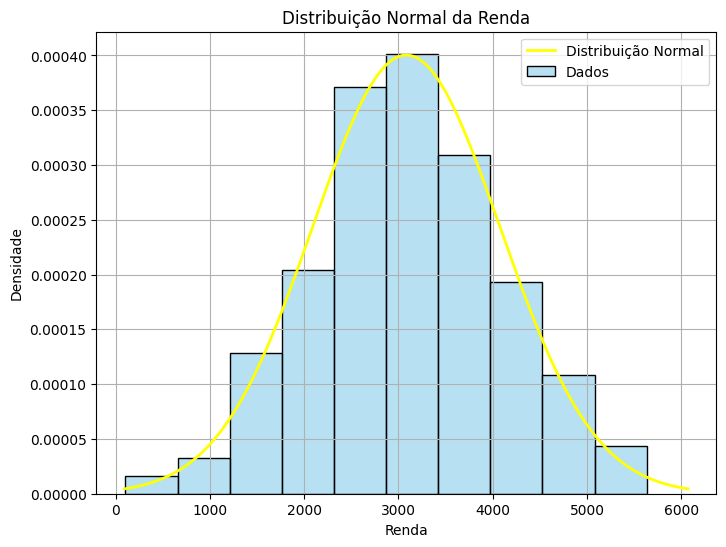

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['renda'], kde=False, bins=10, color='skyblue', stat='density', label='Dados', alpha=0.6)
plt.plot(x, y, color='yellow', label='Distribuição Normal', lw=2)

plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
escolaridade_pos_graduacao = df[df['escolaridade'] == 'Pós-graduação']
escolaridade_pos_graduacao

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
11,SC,41,Pós-graduação,Intermediário,2396.01,M
15,GO,20,Pós-graduação,Básico,3254.42,M
16,RO,39,Pós-graduação,Básico,3337.60,M
18,MS,41,Pós-graduação,Avançado,2512.39,F
19,SP,61,Pós-graduação,Básico,2567.44,F
...,...,...,...,...,...,...
987,PA,28,Pós-graduação,Avançado,4088.75,M
988,SC,53,Pós-graduação,Básico,4884.59,F
992,DF,50,Pós-graduação,Básico,3140.89,F
994,DF,27,Pós-graduação,Avançado,3323.17,F


In [ ]:
# Número de pessoas com pós-graduação no conjunto de dados
total_pessoas_escolaridade_pos_graduacao = len(escolaridade_pos_graduacao)
total_pessoas_escolaridade_pos_graduacao

253

In [ ]:
# Número total de pessoas no dataframe
total_pessoas_df = len(df)
total_pessoas_df

1000

In [ ]:
# a. Probabilidade de pessoas com escolaridade de pós-graduação
probabilidade_pos_graduacao = total_pessoas_escolaridade_pos_graduacao / total_pessoas_df

print(f'Probabilidade de pessoas com escolaridade de pós-graduação: {probabilidade_pos_graduacao:.2%}')

Probabilidade de pessoas com escolaridade de pós-graduação: 25.30%


In [ ]:
# b. Qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

# Tamanho da amostra
n = 1000000

# Número de sucessos esperados
k = 243000

# Probabilidade de pessoas com escolaridade de pós-graduação
p = probabilidade_pos_graduacao

probabilidade_amostra = binom.pmf(k, n, p)

print(f'Probabilidade de encontrar exatamente 243 mil pessoas com pós-graduação: {probabilidade_amostra}')

Probabilidade de encontrar exatamente 243 mil pessoas com pós-graduação: 1.1104854289794913e-119


**A chance de encontrar 243 mil pessoas com pós-graduação em uma amostra de 1 milhão se torna praticamente impossível, resultando em uma probabilidade muito próxima de 0**

7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [ ]:
# Contar ocorrências para cada nível de escolaridade
contagem_escolaridade = df['escolaridade'].value_counts()
contagem_escolaridade

,count
escolaridade,
Fundamental,266
Pós-graduação,253
Superior,243
Médio,238


In [ ]:
# Calcular a frequência relativa
frequencia_relativa = contagem_escolaridade / contagem_escolaridade.sum()
frequencia_relativa

,count
escolaridade,
Fundamental,0.266
Pós-graduação,0.253
Superior,0.243
Médio,0.238


In [ ]:
# Calcular a densidade acumulada
# cumsum() realiza a soma cumulativa das frequências relativas
densidade_acumulada = frequencia_relativa.cumsum()

densidade_acumulada

,count
escolaridade,
Fundamental,0.266
Pós-graduação,0.519
Superior,0.762
Médio,1.000


8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?

In [15]:
ingles_intermediario = df[(df['nível de proficiência em inglês'] == 'Intermediário') | (df['nível de proficiência em inglês'] == 'Básico')]
ingles_intermediario

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
6,DF,56,Médio,Intermediário,528.36,F
...,...,...,...,...,...,...
992,DF,50,Pós-graduação,Básico,3140.89,F
995,AC,22,Médio,Básico,2852.40,F
996,PE,40,Fundamental,Básico,2533.96,M
997,GO,27,Pós-graduação,Intermediário,1405.30,F


In [16]:
total_ingles_intermediario = len(ingles_intermediario)
total_ingles_intermediario

656

In [17]:
total_ingles_intermediario = 329
total_amostra = 1000

# probabilidade
p = total_ingles_intermediario / total_amostra

# Valor crítico para 95% de confiança
Z = 1.96

# Fórmula da margem de erro
ME = Z * math.sqrt((p * (1 - p)) / total_amostra)

print(f'Margem de erro amostral: {ME:.2%}')

Margem de erro amostral: 2.91%


9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?

In [ ]:
# Calcular a média da coluna 'renda'
media_renda = df['renda'].mean()

print(f"A média da renda é: R$ {media_renda:.2f}")

A média da renda é: R$ 3082.54


In [ ]:
#  Limite de renda
limite_renda = media_renda + 1000
print(f"{limite_renda:.2f}")

4082.54


In [ ]:
# Calcular a proporção de pessoas com renda acima do limite
pessoa_acima_limite = df[df['renda'] > limite_renda]
pessoa_acima_limite

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
5,AM,38,Fundamental,Avançado,4441.57,F
14,CE,41,Médio,Básico,4167.78,M
23,AM,38,Médio,Intermediário,5075.40,M
26,MS,39,Pós-graduação,Intermediário,4201.21,F
33,SC,32,Pós-graduação,Avançado,4676.44,F
...,...,...,...,...,...,...
981,PB,64,Médio,Intermediário,4854.09,F
982,AL,18,Superior,Intermediário,4221.03,F
987,PA,28,Pós-graduação,Avançado,4088.75,M
988,SC,53,Pós-graduação,Básico,4884.59,F


In [ ]:
# Contagem de pessoas com renda acima do limite
contagem = len(pessoa_acima_limite)
contagem

161

In [ ]:
# Probabilidade de pessoas com renda acima do limite
p_acima_limite = contagem / df.shape[0]
p_acima_limite

0.161

In [ ]:
# Calcular a probabilidade binomial de encontrar exatamente 60 pessoas com renda mais alta
n = 60  # número total de personas
k = 60  # éxitos deseados (exactamente 60 personas con renda superior)
p = p_acima_limite

# Calcular la probabilidad usando la distribución binomial
probabilidade_60_pessoas = binom.pmf(k, n, p)

print(f'A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é: {probabilidade_60_pessoas}')

A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é: 2.5677489595221674e-48


10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [ ]:
# Filtrar pessoas: Sudeste, homem, ensino fundamental e renda > 2000
pessoas_filtradas = df[
    (df['estado'].isin(['SP', 'RJ', 'MG', 'ES'])) &
    (df['sexo'] == 'M') &
    (df['escolaridade'] == 'Fundamental') &
    (df['renda'] > 2000)
]
pessoas_filtradas

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
155,ES,32,Fundamental,Intermediário,3615.94,M
163,ES,45,Fundamental,Básico,4049.01,M
205,ES,19,Fundamental,Avançado,3026.09,M
301,SP,50,Fundamental,Avançado,2786.01,M
505,SP,18,Fundamental,Básico,2961.49,M
524,MG,27,Fundamental,Intermediário,4148.77,M
612,RJ,19,Fundamental,Intermediário,2008.61,M
626,RJ,21,Fundamental,Intermediário,4022.57,M
680,ES,29,Fundamental,Intermediário,2164.65,M
732,MG,50,Fundamental,Intermediário,4091.31,M


In [ ]:
contagem_pessoas_filtradas = len(pessoas_filtradas)
contagem_pessoas_filtradas

19

In [ ]:
probabilidade_pessoas_filtradas = contagem_pessoas_filtradas / df.shape[0]
print(f'A probabilidade é: {probabilidade_pessoas_filtradas:.2%}')

A probabilidade é: 1.90%
